In [3]:
try:
  import qiskit
  import qiskit_aer
  import qiskit_nature
  import qiskit_ibm_runtime
  import pyscf
  import pylatexenc
except:
  !pip install qiskit qiskit-aer qiskit-ibm-runtime qiskit_nature pyscf pylatexenc

# General imports
import numpy as np
from datetime import datetime


# Qiskit Runtime
from qiskit.primitives import Estimator
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

# Local imports
from src.moleculemanager import MoleculeManager
from src.helpers import *

In [11]:
# molecule definition
lih = MoleculeInfo(
  symbols=["Li", "H"],
  coords=([1.0, 0.0, 0.0], [0.0, 0.0, 0.0]),
  multiplicity=1,  # = 2*spin + 1
  charge=0,
)

molecule = MoleculeManager(lih, "$LiH$")

In [14]:
domain = np.linspace(0.1, 1.7, 20)

cobyla_exact_energies = []
cobyla_vqe_energies = []

now = datetime.now().time()
cobyla_start = now.hour * 3600 + now.minute * 60 + now.second

for dist in domain:
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=10, tol=0.0001),
    output_info=False,
  )
  cobyla_exact_energies.append(exact_res.total_energies)
  cobyla_vqe_energies.append(vqe_res.total_energies)
  
now = datetime.now().time()
cobyla_end = now.hour * 3600 + now.minute * 60 + now.second
dcobyla = cobyla_end - cobyla_start
print(f'COBYLA worked for {dcobyla} sec.')

09:37:24 FindGroundStateExactSolver started.
09:37:25 FindGroundStateExactSolver done.
09:37:25 FindGroundStateVQE started.
09:37:27 ansatz initialized
09:37:28 VQE compute_minimum_eigenvalue done
09:37:28 FindGroundStateVQE done.
09:37:28 FindGroundStateExactSolver started.
09:37:29 FindGroundStateExactSolver done.
09:37:29 FindGroundStateVQE started.
09:37:30 ansatz initialized
09:37:31 VQE compute_minimum_eigenvalue done
09:37:31 FindGroundStateVQE done.
09:37:31 FindGroundStateExactSolver started.
09:37:32 FindGroundStateExactSolver done.
09:37:32 FindGroundStateVQE started.
09:37:33 ansatz initialized
09:37:35 VQE compute_minimum_eigenvalue done
09:37:35 FindGroundStateVQE done.
09:37:35 FindGroundStateExactSolver started.
09:37:36 FindGroundStateExactSolver done.
09:37:36 FindGroundStateVQE started.
09:37:37 ansatz initialized
09:37:38 VQE compute_minimum_eigenvalue done
09:37:38 FindGroundStateVQE done.
09:37:38 FindGroundStateExactSolver started.
09:37:39 FindGroundStateExactSo

In [17]:
domain = np.linspace(0.1, 1.7, 20)

SLSQP_exact_energies = []
SLSQP_vqe_energies = []

now = datetime.now().time()
SLSQP_start = now.hour * 3600 + now.minute * 60 + now.second

for dist in domain:
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=SLSQP(maxiter=10, tol=0.0001),
    output_info=False,
  )
  SLSQP_exact_energies.append(exact_res.total_energies)
  SLSQP_vqe_energies.append(vqe_res.total_energies)
  
now = datetime.now().time()
SLSQP_end = now.hour * 3600 + now.minute * 60 + now.second
dSLSQP = SLSQP_end - SLSQP_start
print(f'SLSQP worked for {dSLSQP} sec.')

09:40:38 FindGroundStateExactSolver started.
09:40:40 FindGroundStateExactSolver done.
09:40:40 FindGroundStateVQE started.
09:40:41 ansatz initialized
09:40:48 VQE compute_minimum_eigenvalue done
09:40:48 FindGroundStateVQE done.
09:40:48 FindGroundStateExactSolver started.
09:40:49 FindGroundStateExactSolver done.
09:40:49 FindGroundStateVQE started.
09:40:50 ansatz initialized
09:40:57 VQE compute_minimum_eigenvalue done
09:40:57 FindGroundStateVQE done.
09:40:57 FindGroundStateExactSolver started.
09:40:58 FindGroundStateExactSolver done.
09:40:58 FindGroundStateVQE started.
09:40:58 ansatz initialized
09:41:06 VQE compute_minimum_eigenvalue done
09:41:06 FindGroundStateVQE done.
09:41:06 FindGroundStateExactSolver started.
09:41:07 FindGroundStateExactSolver done.
09:41:07 FindGroundStateVQE started.
09:41:08 ansatz initialized
09:41:17 VQE compute_minimum_eigenvalue done
09:41:17 FindGroundStateVQE done.
09:41:17 FindGroundStateExactSolver started.
09:41:18 FindGroundStateExactSo

In [19]:
SPSA_exact_energies = []
SPSA_vqe_energies = []

now = datetime.now().time()
SPSA_start = now.hour * 3600 + now.minute * 60 + now.second

for dist in domain:
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=SPSA(maxiter=10),
    output_info=False,
  )
  SPSA_exact_energies.append(exact_res.total_energies)
  SPSA_vqe_energies.append(vqe_res.total_energies)
  
now = datetime.now().time()
SPSA_end = now.hour * 3600 + now.minute * 60 + now.second
dSPSA = SPSA_end - SPSA_start
print(f'SPSA worked for {dSPSA} sec.')

09:43:53 FindGroundStateExactSolver started.
09:43:54 FindGroundStateExactSolver done.
09:43:54 FindGroundStateVQE started.
09:43:55 ansatz initialized
09:43:57 VQE compute_minimum_eigenvalue done
09:43:57 FindGroundStateVQE done.
09:43:57 FindGroundStateExactSolver started.
09:43:58 FindGroundStateExactSolver done.
09:43:58 FindGroundStateVQE started.
09:43:59 ansatz initialized
09:44:01 VQE compute_minimum_eigenvalue done
09:44:01 FindGroundStateVQE done.
09:44:01 FindGroundStateExactSolver started.
09:44:02 FindGroundStateExactSolver done.
09:44:02 FindGroundStateVQE started.
09:44:03 ansatz initialized
09:44:04 VQE compute_minimum_eigenvalue done
09:44:04 FindGroundStateVQE done.
09:44:04 FindGroundStateExactSolver started.
09:44:05 FindGroundStateExactSolver done.
09:44:05 FindGroundStateVQE started.
09:44:06 ansatz initialized
09:44:08 VQE compute_minimum_eigenvalue done
09:44:08 FindGroundStateVQE done.
09:44:08 FindGroundStateExactSolver started.
09:44:09 FindGroundStateExactSo

In [25]:
times = [
  (dcobyla, 'COBYLA'),
  (dSLSQP, 'SLSQP'),
  (dSPSA, 'SPSA')
]
times = sorted(times, key=lambda x: x[0])
for (val, name) in times:
  timeinfo = f'{val // 60} min {val % 60} sec' + ' '*(14 - len(f'{val // 60} min {val % 60} sec')) + f'[{val} sec]:'
  print(timeinfo+' '*(26 - len(timeinfo))+f'{name}')

1 min 4 sec   [64 sec]:   COBYLA
1 min 12 sec  [72 sec]:   SPSA
2 min 59 sec  [179 sec]:  SLSQP


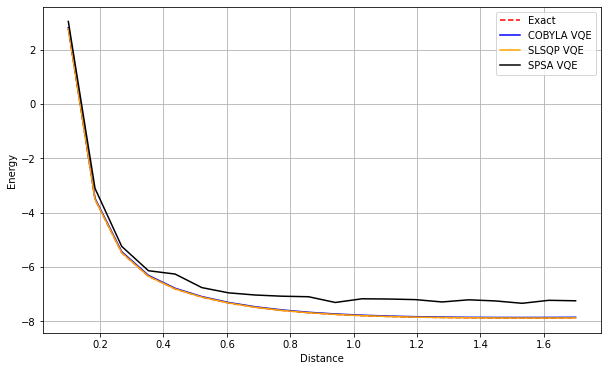

In [30]:
plot_comparisons(
  data = [
    cobyla_exact_energies,
    cobyla_vqe_energies,
    SLSQP_vqe_energies,
    SPSA_vqe_energies
  ],
  domain=domain,
  labels=[
    'Exact',
    'COBYLA VQE',
    'SLSQP VQE',
    'SPSA VQE',
  ],
  colors=['red', 'blue', 'orange', 'black'],
  linestyles=['--']
)

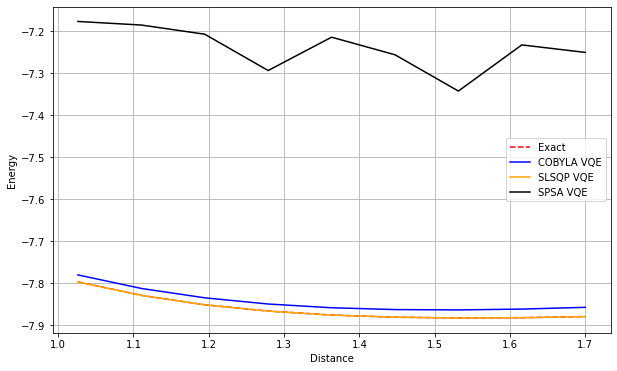

In [31]:
plot_comparisons(
  data = [
    cobyla_exact_energies,
    cobyla_vqe_energies,
    SLSQP_vqe_energies,
    SPSA_vqe_energies
  ],
  domain=domain,
  labels=[
    'Exact',
    'COBYLA VQE',
    'SLSQP VQE',
    'SPSA VQE',
  ],
  colors=['red', 'blue', 'orange', 'black'],
  linestyles=['--'],
  lower_bound=1
)

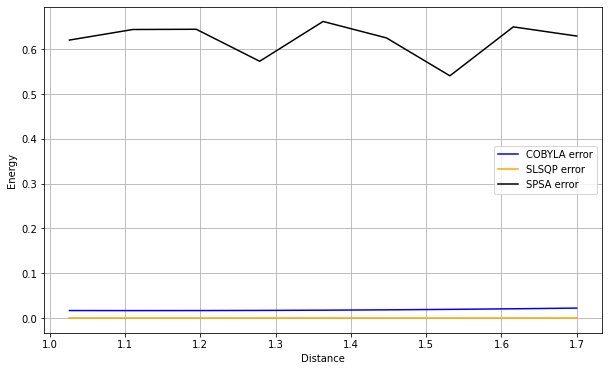

In [33]:
err_cobyla = np.abs(np.array(cobyla_vqe_energies) - np.array(cobyla_exact_energies))
err_SLSQP = np.abs(np.array(SLSQP_vqe_energies) - np.array(cobyla_exact_energies))
err_SPSA = np.abs(np.array(SPSA_vqe_energies) - np.array(cobyla_exact_energies))

plot_comparisons(
  data = [
    err_cobyla,
    err_SLSQP,
    err_SPSA
  ],
  domain=domain,
  labels=[
    'COBYLA error',
    'SLSQP error',
    'SPSA error',
  ],
  colors=['blue', 'orange', 'black'],
  lower_bound=1
)

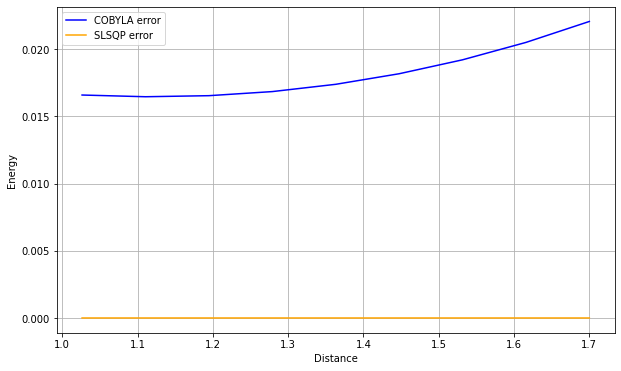

In [34]:

plot_comparisons(
  data = [
    err_cobyla,
    err_SLSQP,
  ],
  domain=domain,
  labels=[
    'COBYLA error',
    'SLSQP error',
  ],
  colors=['blue', 'orange'],
  lower_bound=1
)